In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68557_I')

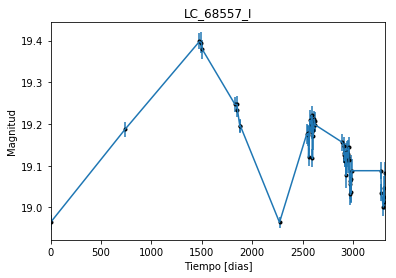

In [2]:
data = np.genfromtxt('LC_68557_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68557_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

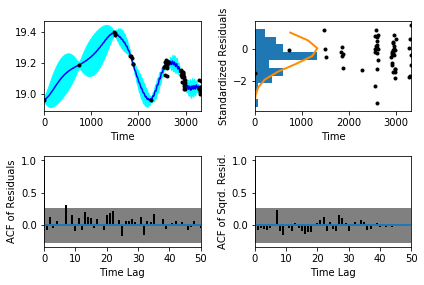

In [5]:
sample.assess_fit()

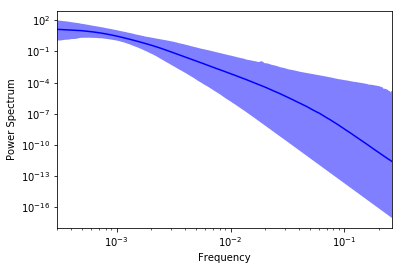

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68557_I')

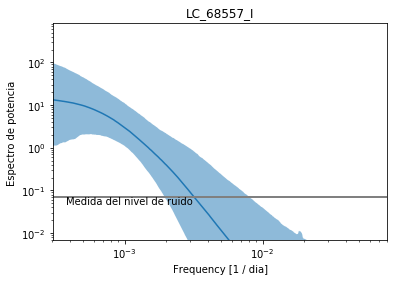

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68557_I')

Text(0.5,1,'Prediccion , valor esperado LC_68557_I')

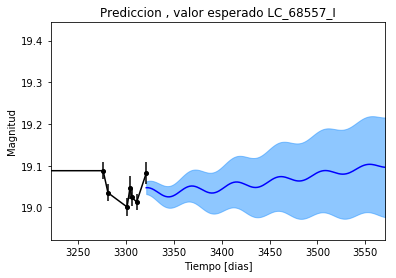

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_68557_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_68557_I')

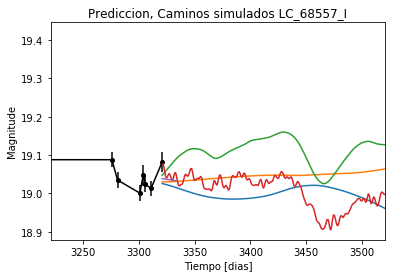

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68557_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68557_I')

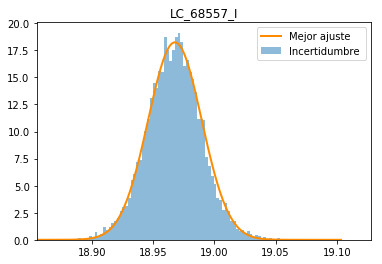

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68557_I')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_I')

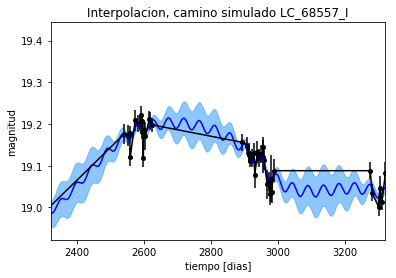

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_I')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_I')

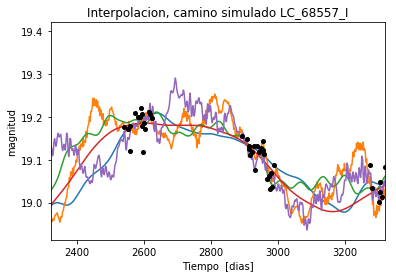

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 723.280348727
Median: 0.00453651160238
Standard deviation: 0.102188076574
68% credibility interval: [ 0.00052135  0.09979785]
95% credibility interval: [  3.21292490e-04   4.17936765e-01]
99% credibility interval: [  3.06335751e-04   4.87433468e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 509.065522114
Median: 0.000976777949652
Standard deviation: 0.0556576364979
68% credibility interval: [ 0.00039478  0.01250547]
95% credibility interval: [ 0.00031308  0.17279047]
99% credibility interval: [  3.02561649e-04   4.25536082e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 596.073469038
Median: 0.00477345544405
Standa

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 10374.4484392
Median: 121.136377657
Standard deviation: 1.73223809372
68% credibility interval: [ 119.30373319  122.38468799]
95% credibility interval: [ 116.88435357  123.79150578]
99% credibility interval: [ 114.86408935  125.83667767]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 337.022070001
Median: 0.302559872863
Standard deviation: 1.07113499432
68% credibility interval: [ 0.02636251  1.76752456]
95% credibility interval: [ 0.01087553  3.6656394 ]
99% credibility interval: [ 0.00846141  5.35160787]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 207.275787806
Median: 0.0429443785184
Standard deviation: 2.30340782841
68% credibility interval: [ 0.00362247  1.15521029]
95% credibility interval: [  2.14625428e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.3833405
Median: 2.72111519138e-36
Standard deviation: 2.03933102303e+135
68% credibility interval: [  6.43559558e-89   9.11708383e+00]
95% credibility interval: [  2.56327246e-156   4.00354889e+063]
99% credibility interval: [  1.99283994e-165   3.19705213e+120]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2410.49613007
Median: 19.130862463
Standard deviation: 0.0903453488233
68% credibility interval: [ 19.06021955  19.19589812]
95% credibility interval: [ 18.94387224  19.31384604]
99% credibility interval: [ 18.80849062  19.43025171]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 395.309982506
Median: 0.00101623267668
Standard deviation: 0.11091709438
68% credibility interval: [ 0.          0.10833785]
95% credibility interval: [ 0.          0.44113785]
99% credibility interval: [ 0.          0.50439863]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 395.309982506
Median: 0.00101623267668
Standard deviation: 0.11091709438
68% credibility interval: [ 0.          0.10833785]
95% credibility interval: [ 0.          0.44113785]
99% credibility interval: [ 0.          0.50439863]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 659.201520989
Median: 0.0
Standard deviation: 0.000354459741914
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 10374.4484392
Median: 121.136377657
Standard deviation: 1.73223809372
68% credibility interval: [ 119.30373319  122.38468799]
95% credibility interval: [ 116.88435357  123.79150578]
99% credibility interval: [ 114.86408935  125.83667767]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 607.113633258
Median: 0.0247185597436
Standard deviation: 0.0374349370691
68% credibility interval: [ 0.01337866  0.05189987]
95% credibility interval: [ 0.00842695  0.13471578]
99% credibility interval: [ 0.0067552   0.23844118]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 844.355297909
Median: 1.15180834192
Standard deviation: 0.203345168695
68% credibility interval: [ 0.96119775  1.35580415]
95% credibility interval: [ 0.80224391  1.59220011]
99% credibility interval: [ 0.71358149  1.75903141]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 635.613209717
Median: 3.04568494819e-06
Standard deviation: 0.00618013341561
68% credibility interval: [  1.16597644e-08   2.06842058e-04]
95% credibility interval: [  7.61243229e-68   3.78802929e-03]
99% credibility interval: [  6.04247479e-124   1.53805157e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 723.280348727
Median: (-0.0285037430459-0.496801030389j)
Standard deviation: 0.94759527156
68% credibility interval: [-0.62704841-0.21722906j -0.00327577-0.00155699j]
95% credibility interval: [ -2.62597414e+00+0.j         -2.01874025e-03-0.1335002j]
99% credibility interval: [ -3.06263480e+00+0.j          -1.92476429e-03-0.00626045j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 509.065522114
Median: (-0.00613727686163+0j)
Standard deviation: 0.779732267457
68% credibility interval: [-0.07857419+0.96453506j -0.00248049+0.00409095j]
95% credibility interval: [-1.08567456+1.61544576j -0.00196714+0.j        ]
99% credibility interval: [ -2.67372206e+00+2.91956993j  -1.90105091e-03+0.j        ]
Posterior summary for par